In [5]:
import pandas as pd

In [13]:
bank = pd.read_csv('bank-full.csv',sep=';')

In [14]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [16]:
bank.shape

(45211, 17)

## A. Data Preprocessing

In [21]:
# check null value
null_column=bank.isnull().sum()[bank.isnull().sum()>0].index.tolist()
#⬆️筛选出含有空值的列，并返回这些列名的列表

In [22]:
null_column

[]

In [38]:
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
y            0
dtype: int64

In [23]:
# check duplicated value
bank.duplicated().sum()

0

In [27]:
bank.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [29]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [33]:
# columns with unknown values

unknown_counts = bank.apply(lambda c: c.value_counts().get('unknown', 0))
print(unknown_counts)


age              0
job            288
marital          0
education     1857
default          0
balance          0
housing          0
loan             0
contact      13020
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome     36959
y                0
dtype: int64


In [36]:
unknown_counts = bank.apply(lambda c: (c == 'unknown').sum())
print(unknown_counts)

age              0
job            288
marital          0
education     1857
default          0
balance          0
housing          0
loan             0
contact      13020
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome     36959
y                0
dtype: int64


In [ ]:
unknown_counts = bank.apply(lambda c: c.value_counts('unknown'))
print(unknown_counts)

错误⬆️
value_counts 方法本身不接受参数作为查询条件。
它用于计算一列中每个不同值的出现频率，而不是根据特定值（如 'unknown'）进行计数。

In [37]:
# drop irrelevant columns
bank = bank.drop(columns=['contact','poutcome'])

In [40]:
# delete unknown rows

bank = bank[bank['education'] != 'unknown']

In [45]:
bank = bank[bank['job'] != 'unknown']

In [46]:
bank.shape

(43193, 15)

In [ ]:
# encode categorical variables

In [47]:
# 1:converted; 0:not converted
bank['convert_status'] = bank['y'].apply(lambda c:1  if c == 'yes' else 0)

In [53]:
bank['housing'].unique()

array(['yes', 'no'], dtype=object)

In [48]:
# 1:have house; 0:don't have house
bank['housing_status'] = bank['housing'].apply(lambda c:1  if c == 'yes' else 0)

In [54]:
bank['loan'].unique()

array(['no', 'yes'], dtype=object)

In [51]:
# 1:have loan; 0:don't have loan
bank['loan_status'] = bank['loan'].apply(lambda c:1  if c == 'yes' else 0)

In [56]:
bank = bank.drop(columns = ['housing','loan','y'] )

In [ ]:
# edcode job, marital, education

In [58]:
bank['job'].unique()

array(['management', 'technician', 'entrepreneur', 'retired', 'admin.',
       'services', 'blue-collar', 'self-employed', 'unemployed',
       'housemaid', 'student'], dtype=object)

In [59]:
bank = pd.get_dummies(data=bank, columns=['job'])

In [61]:
bank['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [62]:
bank = pd.get_dummies(data=bank, columns=['marital'])

In [63]:
bank['education'].unique()

array(['tertiary', 'secondary', 'primary'], dtype=object)

In [65]:
bank = pd.get_dummies(data=bank, columns=['education'])

In [73]:
bank = pd.get_dummies(data=bank, columns=['default'])

In [67]:
bank['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [68]:
months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

bank['month'] = bank['month'].apply(lambda x: months.index(x)+1)

In [72]:
bank.groupby('campaign').count()['convert_status']

campaign
1     16742
2     11938
3      5277
4      3399
5      1703
6      1234
7       696
8       516
9       307
10      255
11      190
12      149
13      123
14       85
15       81
16       75
17       65
18       47
19       43
20       42
21       33
22       20
23       20
24       20
25       22
26       12
27        9
28       16
29       13
30        8
31       11
32        9
33        6
34        4
35        3
36        4
37        1
38        3
39        1
41        2
43        2
44        1
46        1
50        2
51        1
55        1
58        1
Name: convert_status, dtype: int64

In [76]:
# any other categoric columns ?
cols = bank.columns
num_cols = bank._get_numeric_data().columns
cat_cols = list(set(cols) - set(num_cols))
cat_cols

[]

In [ ]:
# scale numerical variables

In [77]:
from sklearn.preprocessing import MinMaxScaler 

scaler = MinMaxScaler(feature_range=(0, 1)) 
bank = pd.DataFrame(scaler.fit_transform(bank), columns = bank.columns) 

In [79]:
bank.head()

,age,balance,day,month,duration,campaign,pdays,previous,convert_status,housing_status,...,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,default_no,default_yes
0,0.519481,0.092259,0.133333,0.363636,0.053070,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.337662,0.073067,0.133333,0.363636,0.030704,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0.194805,0.072822,0.133333,0.363636,0.015453,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.220779,0.074901,0.133333,0.363636,0.028264,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.129870,0.076862,0.133333,0.363636,0.044124,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


In [ ]:
# split the dataset 

In [ ]:
Y_train = bank['convert_status']
X_train = bank.drop(labels = ["convert_status"], axis = 1)

In [80]:
Y_train = bank['convert_status']
X_train = bank.drop(columns = ['convert_status'])

In [102]:
X_train

,age,balance,day,month,duration,campaign,pdays,previous,housing_status,loan_status,...,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,default_no,default_yes
0,0.519481,0.092259,0.133333,0.363636,0.053070,0.000000,0.000000,0.000000,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.337662,0.073067,0.133333,0.363636,0.030704,0.000000,0.000000,0.000000,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0.194805,0.072822,0.133333,0.363636,0.015453,0.000000,0.000000,0.000000,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.220779,0.074901,0.133333,0.363636,0.028264,0.000000,0.000000,0.000000,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.129870,0.076862,0.133333,0.363636,0.044124,0.000000,0.000000,0.000000,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43188,0.428571,0.080293,0.533333,0.909091,0.198658,0.035088,0.000000,0.000000,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
43189,0.688312,0.088501,0.533333,0.909091,0.092721,0.017544,0.000000,0.000000,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
43190,0.701299,0.124689,0.533333,0.909091,0.229158,0.070175,0.212156,0.010909,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
43191,0.506494,0.078868,0.533333,0.909091,0.103294,0.052632,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


In [ ]:
dataframe.loc[row_label, column_label]

In [ ]:
X_train = bank.loc[;,bank.columns.values!='convert_status']

In [ ]:
y=bank.loc[:,'convert_status']
X=bank.loc[:,bank.columns.values!='convert_status']

In [83]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(X_train, Y_train, test_size=0.25,shuffle=True,random_state=101)

In [ ]:
# if解决数据不平衡问题
from imblearn.over_sampling import SMOTE
Smote = SMOTE(random_state=11) 
X_train_over, y_train_over = Smote.fit_resample(train_x, train_y) 

## B. Model Training
#### Random Forests

In [82]:
from sklearn.ensemble import RandomForestClassifier

In [84]:
# 创建随机森林模型
model_rf = RandomForestClassifier()

### Hyperparameter Tuning:

In [88]:
from sklearn.model_selection import RandomizedSearchCV

In [99]:
# 定义超参数范围
param_grid = {
    'n_estimators': [50, 150, 200, 350, 500],        # number of trees
     'criterion' :['gini', 'entropy'],
    'max_features': ['log2'],                        # number of features to consider at every split
    'max_depth': [8,9,10],                           # maximum number of levels in tree
    'min_samples_split': [2,3,5,7,9],                # minimum number of samples required to split a node
    'min_samples_leaf': [1,3,5,7,9],                 # minimum number of samples required at each leaf node
    'bootstrap': [True, False]
}


In [100]:
# 创建随机搜索实例
random_search = RandomizedSearchCV(
    estimator=model_rf,
    param_distributions=param_grid,
    n_iter=10,
    scoring='accuracy',
    cv=5,
    random_state=42,
)

In [101]:
# 执行随机搜索
random_search.fit(X_train, Y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [8, 9, 10],
                                        'max_features': ['log2'],
                                        'min_samples_leaf': [1, 3, 5, 7, 9],
                                        'min_samples_split': [2, 3, 5, 7, 9],
                                        'n_estimators': [50, 150, 200, 350,
                                                         500]},
                   random_state=42, scoring='accuracy')

In [103]:
# get best parameters
best_params_rf = random_search.best_params_
print("Best Parameters:", best_params_rf)

Best Parameters: {'n_estimators': 150, 'min_samples_split': 7, 'min_samples_leaf': 7, 'max_features': 'log2', 'max_depth': 8, 'criterion': 'entropy', 'bootstrap': True}


In [104]:
best_params= {
    'n_estimators': 150, 
    'min_samples_split': 7, 
    'min_samples_leaf': 7, 
    'max_features': 'log2', 
    'max_depth': 8, 
    'criterion': 'entropy', 
    'bootstrap': True
} 

In [105]:
# fit model
best_rf = RandomForestClassifier(**best_params)
#双星号 **，可以将字典 best_params 中的键值对作为关键字参数传递给 RandomForestClassifier 构造函数
best_rf.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', max_depth=8, max_features='log2',
                       min_samples_leaf=7, min_samples_split=7,
                       n_estimators=150)

## C. Prediction and Evaluation

In [106]:
# predict
convert_prdct = best_rf.predict(test_x)

In [ ]:
# evaluation

In [107]:
from sklearn.metrics import accuracy_score, precision_score, f1_score

accuracy = accuracy_score(test_y, convert_prdct)
precision = precision_score(test_y, convert_prdct)
f1 = f1_score(test_y, convert_prdct)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("F1 Score:", f1)

Accuracy: 0.8871191777016391
Precision: 0.8773584905660378
F1 Score: 0.1323843416370107


accuracy and precision is great
but recall is unsatisfiable, model may underestimate converted.

召回率 = 被正确预测为正类别的正类别样本数量 / 所有真实正类别样本数量

召回率低，说明模型在预测实际转化的客户方面做得不够好，遗漏正样本（“假阴性”）。可能导致错失一些潜在的转化机会。

In [118]:
best_params3= {
    'n_estimators': 150, 
    'min_samples_split': 5, 
    'min_samples_leaf': 5, 
    'max_features': 'sqrt', 
    'max_depth': 15, 
    'criterion': 'entropy', 
    'bootstrap': True
} 
best_rf = RandomForestClassifier(**best_params3)
best_rf.fit(X_train, Y_train)
convert_prdct = best_rf.predict(test_x)
accuracy = accuracy_score(test_y, convert_prdct)
precision = precision_score(test_y, convert_prdct)
f1 = f1_score(test_y, convert_prdct)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("F1 Score:", f1)

Accuracy: 0.9321233447541439
Precision: 0.9236526946107785
F1 Score: 0.6273512963904422


🌟 ⬆️ Adjust parameters again and scores are enhanced.

From the trying procedure, it shows that 'max_depth' was too small which led to a low F1 Score(typically Recall Score).

## D. Feature Importance (interpretation)
which features are most influential in driving engagement

In [156]:
importances = pd.DataFrame({'importance': best_rf.feature_importances_,'feature': X_train.columns})

In [252]:
features1=importances.sort_values(by='importance', ascending=False)
features1

,importance,feature
4,0.420160,duration
3,0.092702,month
6,0.075886,pdays
0,0.073469,age
2,0.067929,day
1,0.064826,balance
8,0.048640,housing_status
7,0.038930,previous
5,0.026966,campaign
9,0.009904,loan_status


In [157]:
top_15_features=importances.sort_values(by='importance', ascending=False).head(15)

In [158]:
top_15_features

,importance,feature
4,0.420160,duration
3,0.092702,month
6,0.075886,pdays
0,0.073469,age
2,0.067929,day
1,0.064826,balance
8,0.048640,housing_status
7,0.038930,previous
5,0.026966,campaign
9,0.009904,loan_status


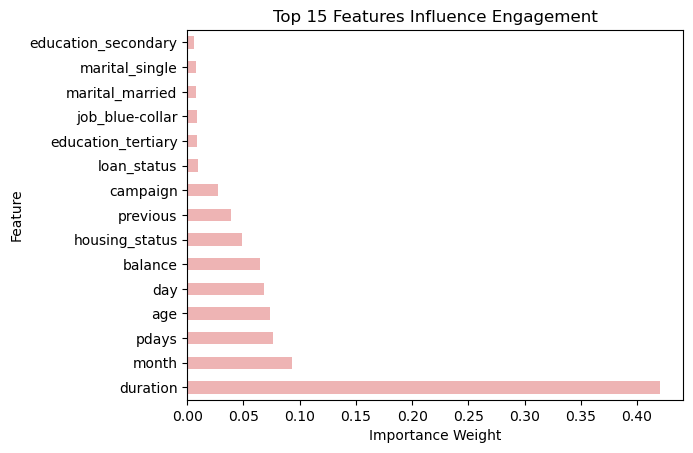

In [164]:
import matplotlib.pyplot as plt
ax = top_15_features.plot(kind='barh', x='feature',title='Top 15 Features Influence Engagement', color='#EEB4B4',legend=False)
#⚠️ barh, x='feature', not y='feature'
ax.set_xlabel('Importance Weight')
ax.set_ylabel('Feature')

plt.show()

## Logistic Regression

In [165]:
from sklearn.linear_model import LogisticRegression

### Hyperparameter Tuning
#### Grid Search

In [166]:
from sklearn.model_selection import GridSearchCV

In [167]:
model_lr = LogisticRegression(random_state=0)

In [200]:
param_grid = {
    'penalty': ['l1', 'l2'],                 # 正则化类型，l1或l2
    'C': [0.1, 1, 5, 10, 50],                # 正则化强度
    'max_iter': [50, 500, 2000, 5000] ,      # 最大迭代次数        
    'solver': ['liblinear', 'saga']          # 求解方法
}


In [201]:
grid_search = GridSearchCV(model_lr, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, Y_train)

/Users/ivoy/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ivoy/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ivoy/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ivoy/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ivoy/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ivoy/anaconda3/lib/python3.11/site-packages/sklearn/linear_mode

GridSearchCV(cv=3,
             estimator=LogisticRegression(C=1, max_iter=1500, random_state=0,
                                          solver='liblinear'),
             param_grid={'C': [0.1, 1, 5, 10, 50],
                         'max_iter': [50, 500, 2000, 5000],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy')

In [202]:
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'C': 0.1, 'max_iter': 50, 'penalty': 'l2', 'solver': 'liblinear'}
Best Score: 0.8461311537082693


In [233]:
lr_best_params = {'C': 10, 'max_iter': 500, 'penalty': 'l2', 'solver': 'liblinear'}

### prediction

In [234]:
model_lr=LogisticRegression(**lr_best_params,random_state=0) 

In [235]:
model_lr.fit(X_train, Y_train)

LogisticRegression(C=10, max_iter=500, random_state=0, solver='liblinear')

In [236]:
model_lr_predict=model_lr.predict(test_x)

### accuracy

In [237]:
accuracy = accuracy_score(test_y, model_lr_predict)
precision = precision_score(test_y, model_lr_predict)
f1 = f1_score(test_y, model_lr_predict)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("F1 Score:", f1)

Accuracy: 0.8898972127048801
Precision: 0.6150627615062761
F1 Score: 0.33089476646032634


### feature importance

In [239]:
lr_importances = pd.DataFrame(data={'importance': model_lr.coef_[0],'feature': X_train.columns})

In [240]:
lr_features=lr_importances.sort_values(by='importance', ascending=False)

In [242]:
lr_features

,importance,feature
4,19.262339,duration
7,14.219431,previous
6,2.677284,pdays
1,1.896103,balance
18,0.705893,job_student
15,0.428592,job_retired
0,0.240720,age
3,0.114266,month
10,0.083505,job_admin.
20,-0.082019,job_unemployed


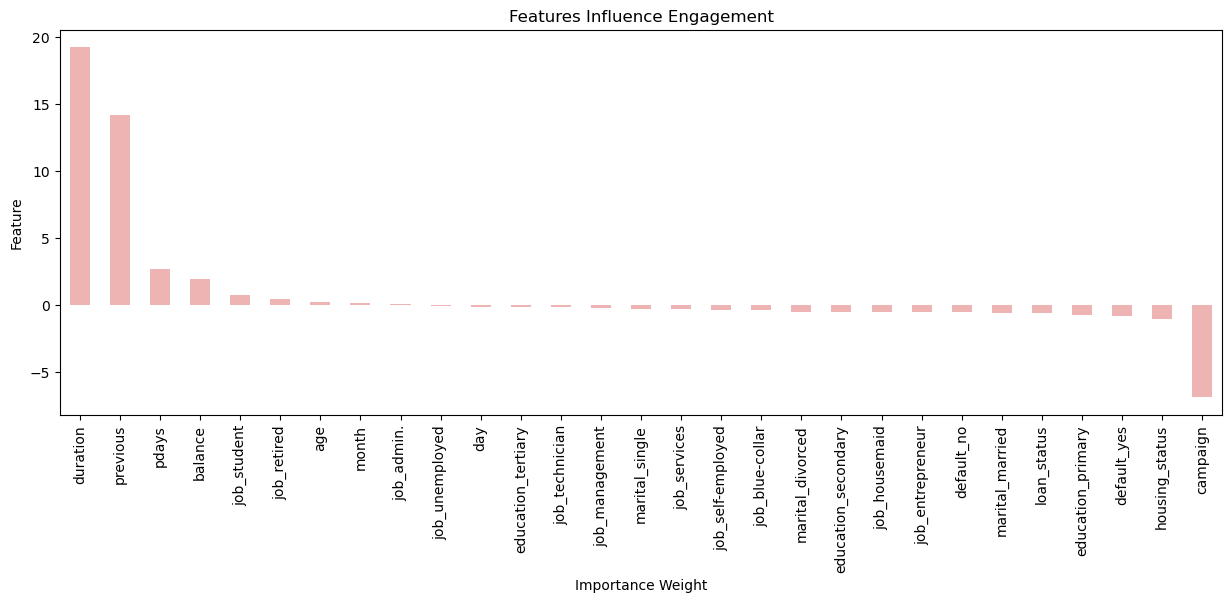

In [250]:
ax = lr_features.plot(kind='bar', x='feature',title='Features Influence Engagement', color='#EEB4B4',legend=False)
ax.set_xlabel('Importance Weight')
ax.set_ylabel('Feature')
ax.figure.set_size_inches(15, 5)

plt.show()

Based on two models' results, the most important features influence individual ads engagement are:

duration, pdays, balance, housing_status(-), loan_status(-), marital_married(-), job_blue_collar(-), education_primary(-)